In [321]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import sympy as sy
import scipy as sp

# Question 1

## Part a)

### 1)

In [68]:
n=100 # 100 data points
x=np.random.uniform(0, 1, n)
x.sort()
eps=np.random.normal(0, 0.1, n)

y=np.sin(2*np.pi*x)+eps

### 2) 

### **Posterior Parameters Derivation**
* **Bayes' Theorem (for point N):**
    $$
    p(\mathbf{w}|t_N) \propto p(t_N|\mathbf{w})p(\mathbf{w})
    $$
* **Log Posterior:**
    $$
    \ln p(\mathbf{w}|t_N) = \ln p(t_N|\mathbf{w}) + \ln p(\mathbf{w}) + \text{const}
    $$
    $$
    = -\frac{\beta}{2}(t_N - \mathbf{w}^T\phi_N)^2 - \frac{1}{2}(\mathbf{w} - \mathbf{m}_{N-1})^T\mathbf{S}_{N-1}^{-1}(\mathbf{w} - \mathbf{m}_{N-1}) + \text{const}
    $$
    Expanding the terms:
    $$
    = -\frac{\beta}{2}(t_N^2 - 2t_N\mathbf{w}^T\phi_N + \mathbf{w}^T\phi_N\phi_N^T\mathbf{w}) - \frac{1}{2}(\mathbf{w}^T\mathbf{S}_{N-1}^{-1}\mathbf{w} - 2\mathbf{m}_{N-1}^T\mathbf{S}_{N-1}^{-1}\mathbf{w} + \text{const}) + \text{const}
    $$
* **Collecting terms in w:**
    $$
    \ln p(\mathbf{w}|t_N) = -\frac{1}{2}\mathbf{w}^T(\mathbf{S}_{N-1}^{-1} + \beta\phi_N\phi_N^T)\mathbf{w} + \mathbf{w}^T(\mathbf{S}_{N-1}^{-1}\mathbf{m}_{N-1} + \beta\phi_N t_N) + \text{const}
    $$

We compare the expression above to the general log-form of a multivariate Gaussian, $\ln \mathcal{N}(\mathbf{w} | \boldsymbol{\mu}, \Sigma) = -\frac{1}{2}\mathbf{w}^T\Sigma^{-1}\mathbf{w} + \mathbf{w}^T\Sigma^{-1}\boldsymbol{\mu} + \text{const}$.

* **Posterior Covariance ($S_N$):**
    By matching the quadratic term, we find the inverse covariance:
    $$
    \mathbf{S}_N^{-1} = \mathbf{S}_{N-1}^{-1} + \beta \phi_N \phi_N^T
    $$
* **Posterior Mean ($m_N$):**
    By matching the linear term, we find:
    $$
    \mathbf{S}_N^{-1}\mathbf{m}_N = \mathbf{S}_{N-1}^{-1}\mathbf{m}_{N-1} + \beta \phi_N t_N
    $$
    Solving for $\mathbf{m}_N$:
    $$
    \mathbf{m}_N = \mathbf{S}_N(\mathbf{S}_{N-1}^{-1}\mathbf{m}_{N-1} + \beta \phi_N t_N)
    $$
* **Resulting Posterior:**
    $$
    p(\mathbf{w}|\mathbf{t}_{1:N}) = \mathcal{N}(\mathbf{w} | \mathbf{m}_N, \mathbf{S}_N)
    $$
?
Dimension of `φ_N`= `D × 1`
Dimension of `t_N`= `1 × 1`

In [305]:
dim=25

mu=np.linspace(0,1, dim)
# std_dev_gauss_basis=1/(mu[1]-mu[0])
std_dev_gauss_basis=(mu[1]-mu[0])

In [70]:
def gauss_basis(x, mu, sigma):
    return np.exp(-0.5*(((x-mu)/sigma)**2))

In [71]:
# phi_x=np.array([(gauss_basis(x[j], mu[i], std_dev_gauss_basis)) for i in range(dim)], dtype=np.float32).reshape(1,-1)
# phi_x.shape

#### Sequential Bayesian Update

In [72]:
beta=1/(0.1**2)

post_mu=[]
post_cov=[]

post_mu.append(np.zeros(dim).reshape(-1,1))
post_cov.append(np.eye(dim))

for j in range(x.shape[0]):
    phi_x=np.array([(gauss_basis(x[j], mu[i], std_dev_gauss_basis)) for i in range(dim)], dtype=np.float32).reshape(1,-1)
    
    dum1=np.linalg.pinv(post_cov[-1])
    dum2=(beta*(phi_x.T@phi_x))
    # print((phi_x.T@phi_x).shape)
    post_cov.append(np.linalg.pinv(dum1+dum2))
    
    dum1=(np.linalg.pinv(post_cov[-2])@post_mu[-1])
    dum2=beta*(phi_x.T@y.reshape(-1,1)[j]).reshape(-1,1)
    post_mu.append(post_cov[-1]@(dum1+dum2))

### 3)

## Part b)

### 1)

In [74]:
w_sampled=[]
w_sampled.append(np.random.multivariate_normal(post_mu[-1].squeeze(1), post_cov[-1], 1))

y_sampled=[]
phi_x_sampled=np.array([(gauss_basis(x, mu[i], std_dev_gauss_basis)) for i in range(dim)], dtype=np.float32)
y_sampled.append(w_sampled[-1]@phi_x_sampled)

phi_x_sampled.shape
# w_sampled[-1].shape

(25, 100)

### 2)

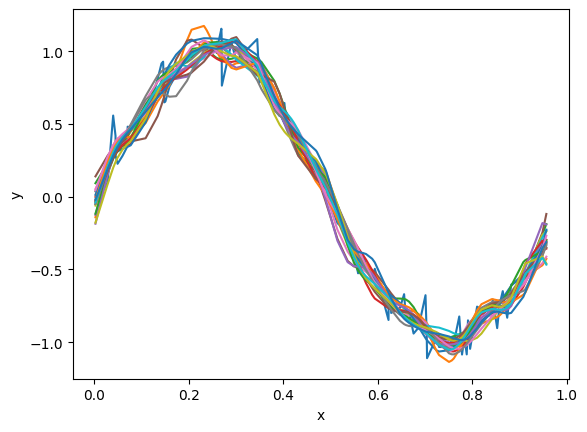

In [75]:
m=20
w_sampled.append(np.random.multivariate_normal(post_mu[-1].squeeze(1), post_cov[-1], m-1))
for j in range(m-1):
    y_sampled.append(w_sampled[-1][j].reshape(1,-1)@phi_x_sampled)

y_sampled_arr=np.array(y_sampled).squeeze(1)

plt.plot(x, y)
for i in range(len(y_sampled)):
    plt.plot(x, y_sampled_arr[i])
    plt.xlabel('x')
    plt.ylabel('y')
plt.show()

### 3)

Avg y value computed from sampled values:
[-0.03226545  0.202877    0.29351198  0.32319809  0.32482859  0.3448584
  0.38367671  0.40952979  0.41254613  0.42941395  0.57189775  0.72236396
  0.76037972  0.77452035  0.78349412  0.79245873  0.82080427  0.86276971
  0.93595602  0.96594779  1.02034665  1.0214354   1.02489086  1.02637818
  1.02275561  1.02130802  1.02116968  1.02091502  1.02063409  1.01439581
  1.01402447  1.01366024  1.00149732  0.99581343  0.89659154  0.87455389
  0.85226197  0.68680594  0.61076361  0.54504354  0.52654259  0.51980772
  0.4932296   0.45521982  0.42419245  0.40614393  0.37264364  0.19819877
  0.18760909  0.0856348   0.06763619 -0.1207803  -0.30250051 -0.38827395
 -0.42863654 -0.43349358 -0.47884857 -0.50255599 -0.55524944 -0.57955848
 -0.7081418  -0.70924522 -0.71328603 -0.72733118 -0.72860661 -0.77921121
 -0.7967374  -0.80421519 -0.81686074 -0.83807257 -0.86531486 -0.91111051
 -0.91946501 -0.92146998 -0.97907029 -0.99131785 -1.01792874 -1.01801194
 -1.016116

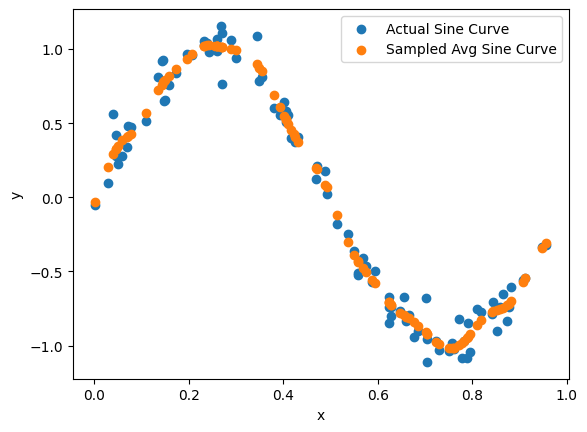

In [76]:
y_sam=y_sampled_arr.sum(axis=0)/len(y_sampled)
print("Avg y value computed from sampled values:")
print(y_sam)

# plt.scatter(x, np.sin(2*np.pi*x)+eps)
plt.scatter(x, y)
plt.scatter(x, y_sam)
plt.legend(["Actual Sine Curve", "Sampled Avg Sine Curve"])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Part c)

### 1)

In [77]:
n=[5, 20, 100] 

In [78]:
def sequential_bayesian_update(post_mu, post_cov, n1):
    n=n1 # n1 data points
    x=np.random.uniform(0, 1, n)
    eps=np.random.normal(0, 0.1, n)
    
    y=np.sin(2*np.pi*x)+eps

    dim=25
    mu=np.linspace(0,1, dim)
    # std_dev_gauss_basis=1/(mu[1]-mu[0])
    std_dev_gauss_basis=(mu[1]-mu[0])

    beta=1/(0.1**2)
    post_mu=[]
    post_cov=[]
    
    post_mu.append(np.zeros(dim).reshape(-1,1))
    post_cov.append(np.eye(dim))
    
    for j in range(x.shape[0]):
        phi_x=np.array([(gauss_basis(x[j], mu[i], std_dev_gauss_basis)) for i in range(dim)], dtype=np.float32).reshape(1,-1)
        
        dum1=np.linalg.pinv(post_cov[-1])
        dum2=(beta*(phi_x.T@phi_x))
        # print((phi_x.T@phi_x).shape)
        post_cov.append(np.linalg.pinv(dum1+dum2))
        
        dum1=(np.linalg.pinv(post_cov[-2])@post_mu[-1])
        dum2=beta*(phi_x.T@y.reshape(-1,1)[j]).reshape(-1,1)
        post_mu.append(post_cov[-1]@(dum1+dum2))

Dataset_size: 100


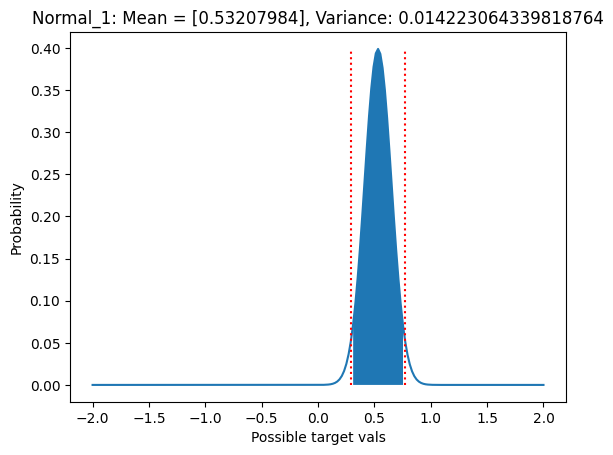

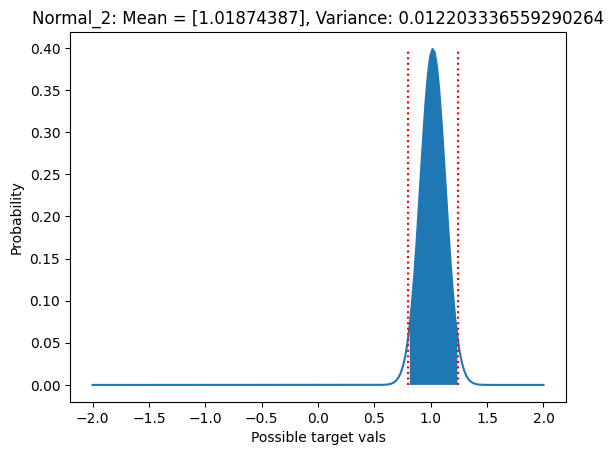

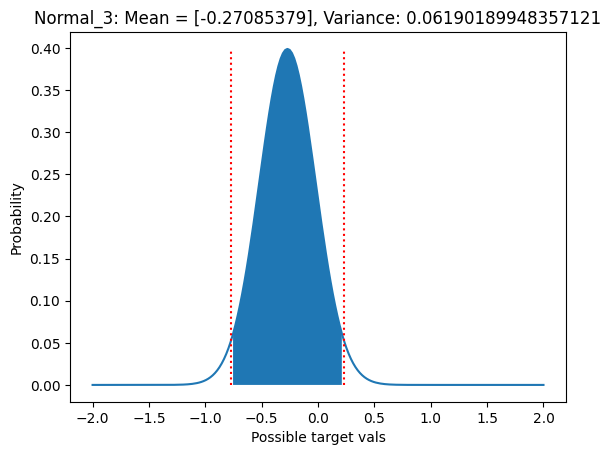

In [79]:
print(f'Dataset_size: {n[2]}')
x0=np.random.uniform(0, 1, 3)

sequential_bayesian_update(post_mu, post_cov, n[2])
phi_x_random=np.array([(gauss_basis(x0, mu[i], std_dev_gauss_basis)) for i in range(dim)], dtype=np.float32)

pred_mu =[phi_x_random[:,i]@post_mu[-1] for i in range(phi_x_random.shape[1])]
pred_var=[(1/beta)+(phi_x_random[:,i]@post_cov[-1]@(phi_x_random[:,i].T)) for i in range(phi_x_random.shape[1])]

dummy=np.linspace(-2, 2, 200)

for i in range(len(pred_mu)):
    dummy_y=np.exp(-((dummy-pred_mu[i])**2) / (2*pred_var[i])) / np.sqrt(2 * np.pi)
    plt.plot(dummy, dummy_y)
    plt.title(f'Normal_{i+1}: Mean = {pred_mu[i]}, Variance: {pred_var[i]}')
    plt.vlines(pred_mu[i]+(2*(pred_var[i]**0.5)), 0,max(dummy_y), 'r', linestyles='dotted')
    plt.vlines(pred_mu[i]-(2*(pred_var[i]**0.5)), 0,max(dummy_y), 'r', linestyles='dotted')
    # Denoting 95% confidence interval with shaded region
    plt.fill_between(dummy, dummy_y, 0, where=((dummy>=pred_mu[i]-(2*(pred_var[i]**0.5))) & (dummy<=pred_mu[i]+(2*(pred_var[i]**0.5)))))
    plt.ylabel('Probability')
    plt.xlabel('Possible target vals')
    plt.show()

### 2)

Dataset_size: 5


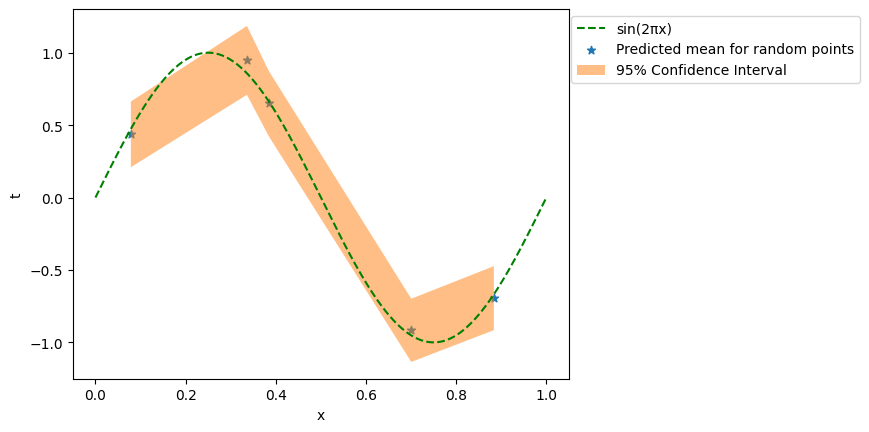

Dataset_size: 20


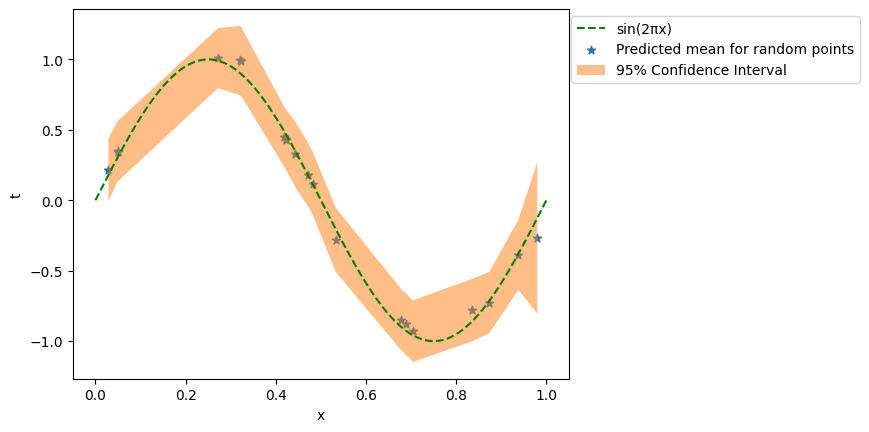

Dataset_size: 100


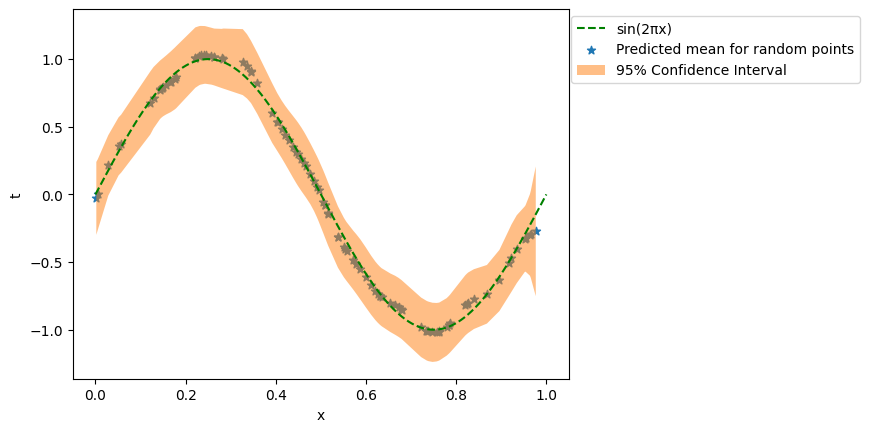

In [80]:
for j in range(len(n)):
    print(f'Dataset_size: {n[j]}')
    x0=np.random.uniform(0, 1, n[j])
    x0.sort()

    sequential_bayesian_update(post_mu, post_cov, n[j])
    
    phi_x_random=np.array([(gauss_basis(x0, mu[i], std_dev_gauss_basis)) for i in range(dim)], dtype=np.float32)
    
    pred_mu =[phi_x_random[:,i]@post_mu[-1] for i in range(phi_x_random.shape[1])]
    pred_var=[(1/beta)+(phi_x_random[:,i]@post_cov[-1]@(phi_x_random[:,i].T)) for i in range(phi_x_random.shape[1])]
    
    dummy=np.linspace(0, 1, 1000)
    pred_mu=np.array([pred_mu]).squeeze(2).squeeze(0)
    pred_var=np.array([pred_var]).squeeze(0)
    
    plt.plot(dummy, np.sin(2*np.pi*dummy), 'g--')
    plt.scatter(x0.reshape(1,-1), pred_mu, marker='*')
    # Denoting 95% confidence interval with shaded region
    plt.fill_between(x0, pred_mu-(2*(pred_var**0.5)), pred_mu+(2*(pred_var**0.5)), alpha=0.5)
    plt.ylabel('t')
    plt.xlabel('x')
    plt.legend(["sin(2πx)", "Predicted mean for random points", "95% Confidence Interval"], bbox_to_anchor=(1.6,1))
    plt.show()

### 3)

#### In 2) We have plotted sin(2πx) with predictive mean overlaid on it 
#### As number of points increases, we can clearly see that shaded region closely overlaps sin(2πx) curve
#### This clearly shows that uncertainity reduces as number of points increase

# Question 2

## 1)


In [340]:
l=100 # 100 independent datasets
n=25 # 25 data points

x_total=np.random.uniform(0, 1, (n, l))
x_total.sort(axis=0)
eps_total=np.random.normal(0, 0.1, (n, l))

y_total=np.array([(np.sin(2*np.pi*x_total[:,i])+eps_total[:,i]) for i in range(x_total.shape[1])])[:, :, None]

## 2) i,ii)

$$
L(w) = \|y - Xw\|^2 + \lambda \|w\|^2
$$

$$
= (y - Xw)^T (y - Xw) + \lambda w^T w
$$

$$
= y^T y - 2w^T X^T y + w^T X^T X w + \lambda w^T w
$$

$$
\frac{\partial L}{\partial w} = -2 X^T y + 2 X^T X w + 2\lambda w
$$

$$
-2 X^T y + 2 X^T X w + 2\lambda w = 0
$$

$$
X^T X w + \lambda w = X^T y
$$

$$
(X^T X + \lambda I) w = X^T y
$$

$$
w_{\text{optimal}} = (X^T X + \lambda I)^{-1} X^T y
$$


In [341]:
dim_2=25

mu_2=np.linspace(0,1, dim_2)
std_dev_gauss_basis_2=mu_2[1]-mu_2[0]

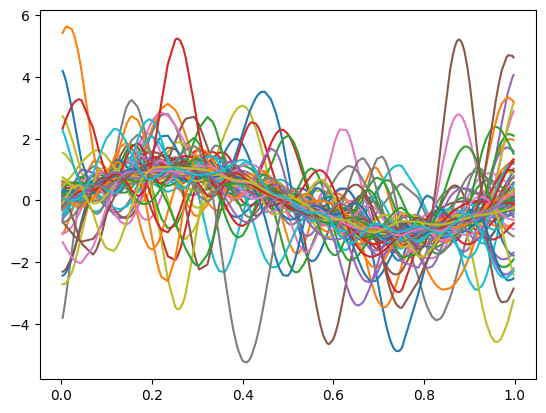

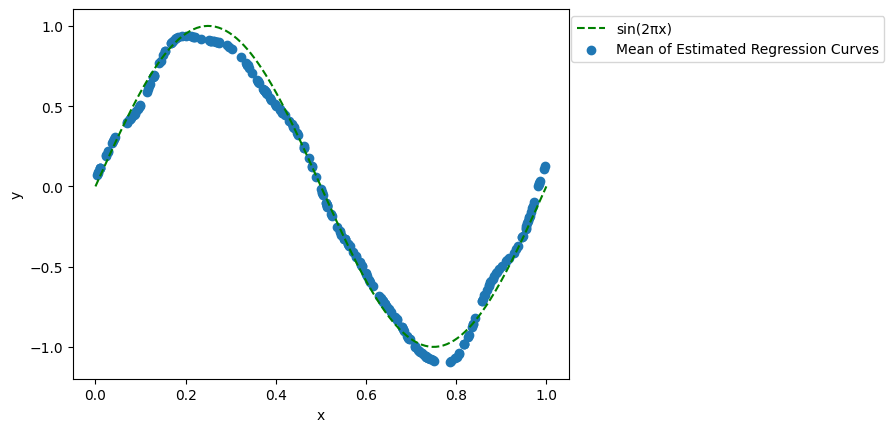

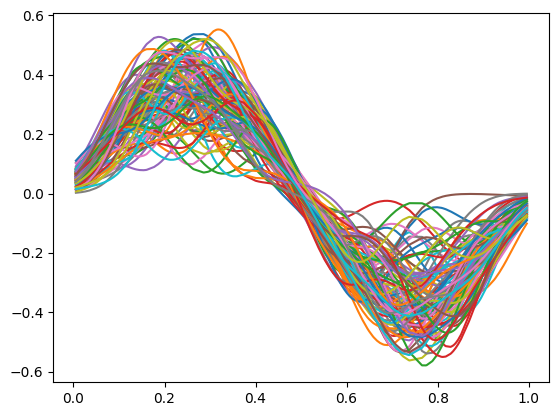

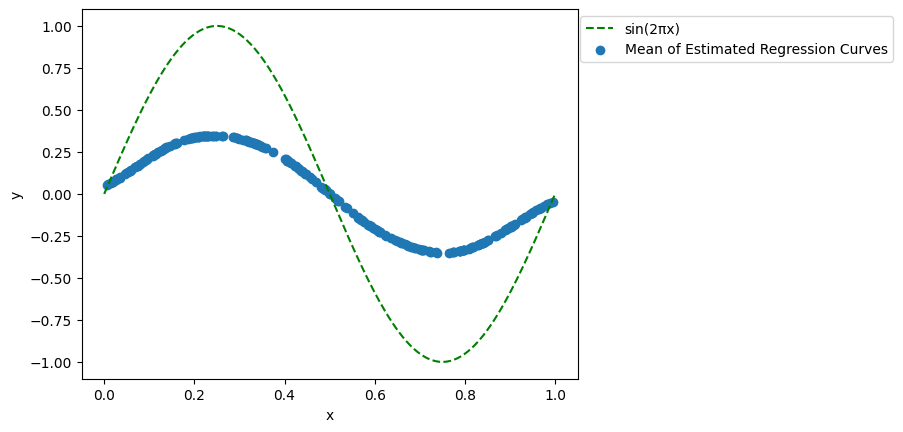

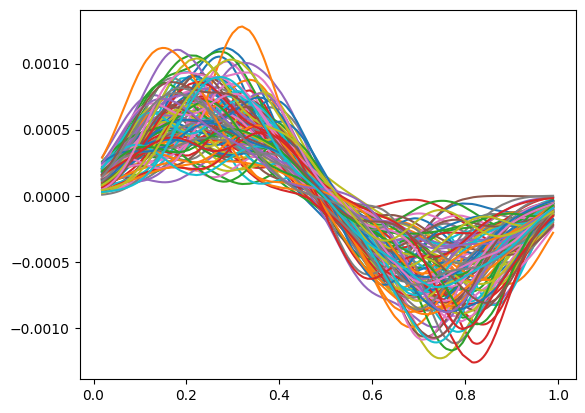

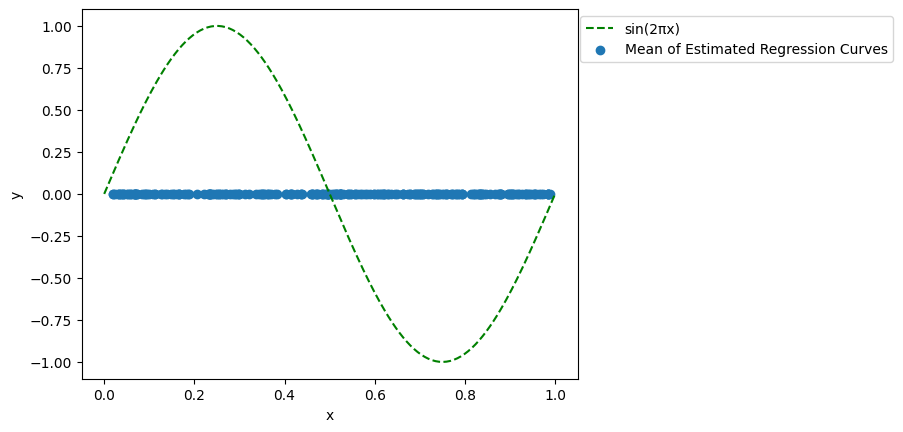

In [368]:
lamb=[1e-4, 10, 1e4]
basis_mat = np.array([(gauss_basis(x_total, mu_2[i], std_dev_gauss_basis_2)) for i in range(dim_2)], dtype=np.float32).T

for i in range(len(lamb)):
    dummy=np.transpose(basis_mat, (0,2,1))@basis_mat
    dummy+=(lamb[i]*(np.zeros((l,dim_2,dim_2))+np.eye(dim_2)))            # Using 3D Identity matrix
    
    # print(basis_mat.shape)
    dummy=(np.linalg.inv(dummy)@np.transpose(basis_mat, (0,2,1)))
    dummy=dummy@y_total
    x_plot=np.random.uniform(0, 1, (250, 1))
    x_plot.sort(axis=0)
    des_x=np.array([(gauss_basis(x_plot, mu_2[i], std_dev_gauss_basis_2)) for i in range(dim_2)], dtype=np.float32)
    des_x=np.transpose(des_x, (2,0,1))
    
    y_reg=(np.transpose(dummy, (0,2,1))@des_x)
    
    
    for ji in range(y_reg.shape[0]):
        plt.plot(x_plot.T.squeeze(0), y_reg[ji].squeeze(0))
    plt.show()
    
    dummy=np.linspace(0, 1, 250)    
    plt.plot(dummy, np.sin(2*np.pi*dummy), 'g--')
    plt.scatter(x_plot.squeeze(1), (y_reg.sum(axis=0)/y_reg.shape[0]).squeeze(0))
    plt.legend(["sin(2πx)", "Mean of Estimated Regression Curves"], bbox_to_anchor=(1.65,1))
    plt.ylabel('y')
    plt.xlabel('x')
    plt.show()

## 3)

#### CLearly Bias (Inabilty of the model to fit the data) increases as lambda increases
#### Also Variance decreases as lambda increases, but beyond a certain point its not super useful (see variance in lambda =10, 1e3 cases (from 100 curves plot))

# Question 3

## 1)

In [103]:
n_tot=500
p_class0=0.5

In [154]:
np.random.normal(0,20, (2,10)).shape

(2, 10)

In [296]:
def datagen(n_tot, p_class0, mean1, mean2, cov1, cov2, noise_bool, mean_noise, var_noise):
    
    # Class Sizes
    n_0 = int(n_tot * p_class0)
    n_1 = n_tot - n_0
    data_0 = np.random.multivariate_normal(mean1, cov1, n_0).T
    data_1 = np.random.multivariate_normal(mean2, cov2, n_1).T
    
    # Adding Gaussian noise if required
    if noise_bool:
        print("Gaussian Noise is added to Data")
        data_0 += np.random.normal(mean_noise, var_noise, (2, n_0))
        data_1 += np.random.normal(mean_noise, var_noise, (2, n_1))
    
    np.random.shuffle(data_0.T)
    np.random.shuffle(data_1.T)
    
    # Using random train and test ratio for each class
    frac_train_0 = np.random.uniform(0.75, 0.85)
    frac_train_1 = np.random.uniform(0.75, 0.85)
    n_train_0 = int(frac_train_0 * n_0)
    n_train_1 = int(frac_train_1 * n_1)
    
    # Fixing 10% of class size as min test set size
    min_test_0 = max(1, int(0.1 * n_0))
    min_test_1 = max(1, int(0.1 * n_1))
    # Adjusting train set sizes if original train set leads to test set with very few entries
    n_train_0 = min(n_train_0, n_0 - min_test_0)
    n_train_1 = min(n_train_1, n_1 - min_test_1)
    
    train_data_0 = data_0[:, :n_train_0]
    test_data_0  = data_0[:, n_train_0:]
    train_data_1 = data_1[:, :n_train_1]
    test_data_1  = data_1[:, n_train_1:]
    
    # plt.scatter(data_0[0, :], data_0[1, :])
    # plt.scatter(data_1[0, :], data_1[1, :])
    # plt.xlabel('x'); plt.ylabel('y')
    # plt.legend(['Class_0', 'Class_1'], bbox_to_anchor=(1.25, 1))
    # plt.show()
    # plt.scatter(train_data_0[0, :], train_data_0[1, :])
    # plt.scatter(test_data_0[0, :], test_data_0[1, :])
    # plt.xlabel('x'); plt.ylabel('y')
    # plt.legend(['Train_Class_0', 'Test_Class_0'], bbox_to_anchor=(1.35, 1))
    # plt.show()
    # plt.scatter(train_data_1[0, :], train_data_1[1, :])
    # plt.scatter(test_data_1[0, :], test_data_1[1, :])
    # plt.xlabel('x'); plt.ylabel('y')
    # plt.legend(['Train_Class_1', 'Test_Class_1'], bbox_to_anchor=(1.35, 1))
    # plt.show()
    
    return train_data_0, test_data_0, train_data_1, test_data_1

In [297]:
train_data_0, test_data_0, train_data_1, test_data_1 = datagen(n_tot=500, p_class0=0.5, mean1=np.array([0,0]), mean2=np.array([1,3]), cov1=np.eye(2), cov2=np.eye(2), noise_bool=0, mean_noise=0, var_noise=1)

## 2)

In [220]:
# Lets calculate unbiased mean and unbiased covariance matrices

mu_data_0=(train_data_0.sum(axis=1)/train_data_0.shape[1]).reshape(-1,1)
mu_data_1=(train_data_1.sum(axis=1)/train_data_1.shape[1]).reshape(-1,1)

cov_data_0=(1/(train_data_0.shape[1]-1))*(train_data_0-mu_data_0)@(train_data_0-mu_data_0).T
cov_data_1=(1/(train_data_1.shape[1]-1))*(train_data_1-mu_data_1)@(train_data_1-mu_data_1).T

In [322]:
np.c_?

Type:        CClass
String form: <numpy.lib._index_tricks_impl.CClass object at 0x000002BA19498100>
Length:      0
File:        c:\users\vishn\appdata\local\programs\python\python312\lib\site-packages\numpy\lib\_index_tricks_impl.py
Docstring:  
Translates slice objects to concatenation along the second axis.

This is short-hand for ``np.r_['-1,2,0', index expression]``, which is
useful because of its common occurrence. In particular, arrays will be
stacked along their last axis after being upgraded to at least 2-D with
1's post-pended to the shape (column vectors made out of 1-D arrays).

See Also
--------
column_stack : Stack 1-D arrays as columns into a 2-D array.
r_ : For more detailed documentation.

Examples
--------
>>> import numpy as np
>>> np.c_[np.array([1,2,3]), np.array([4,5,6])]
array([[1, 4],
       [2, 5],
       [3, 6]])
>>> np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
array([[1, 2, 3, ..., 4, 5, 6]])

In [323]:
def plot_decision_boundary(X_train, y_train, classifier_func, title):
    h = .05  # step size in the mesh
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Points on the grid to be classified
    # np.c_ concatenates along second axis
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = classifier_func(grid_points)
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    cmap_light = ListedColormap(['#FFADAD', '#BDB2FF'])
    cmap_bold = ['#D9534F', '#5D49D1']

    plt.contourf(xx, yy, Z, cmap=cmap_light)
    scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(cmap_bold), edgecolor='k', s=40)
    plt.title(title, fontsize=16)
    plt.xlabel('Feature 1', fontsize=12)
    plt.ylabel('Feature 2', fontsize=12)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Class 0',
                                  markerfacecolor=cmap_bold[0], markersize=10),
                       plt.Line2D([0], [0], marker='o', color='w', label='Class 1',
                                  markerfacecolor=cmap_bold[1], markersize=10)]
    plt.legend(handles=legend_elements, loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

#### Since both datasets have 250 datapoints, both classes have equal prior
#### A new point is classified as Class i, if P($C_i$ | Data) > P($C_j$ | Data), where P($C_k$ | Data) $\propto$ P(Data | $C_k$) * P($C_k$) (k = i,j)

#### Prior for each class without imbalance is equal, Hence prior probabilities are equal (0.5)

### a) Gaussian Naive Bayes

#### For 2 Classes, we will have 2 set of Gaussian parameters 

In [279]:
def gaussian_naive_bayes(p_class0, train_data_0, test_data_0, train_data_1, test_data_1, mu_data_0, cov_data_0, mu_data_1, cov_data_1):

    p_class1=1-p_class0
    
    # Train
    train_res0_0=(1/np.linalg.det(cov_data_0)**0.5)*np.exp(-.5*np.diag((train_data_0-mu_data_0).T@np.linalg.inv(cov_data_0)@(train_data_0-mu_data_0)))*p_class0
    # train_result matrix of train_data_0 wrt class 1
    train_res0_1=(1/np.linalg.det(cov_data_1)**0.5)*np.exp(-.5*np.diag((train_data_0-mu_data_1).T@np.linalg.inv(cov_data_1)@(train_data_0-mu_data_1)))*p_class1
    
    # train_result matrix of train_data_1 wrt class 0
    train_res1_0=(1/np.linalg.det(cov_data_0)**0.5)*np.exp(-.5*np.diag((train_data_1-mu_data_0).T@np.linalg.inv(cov_data_0)@(train_data_1-mu_data_0)))*p_class0
    train_res1_1=(1/np.linalg.det(cov_data_1)**0.5)*np.exp(-.5*np.diag((train_data_1-mu_data_1).T@np.linalg.inv(cov_data_1)@(train_data_1-mu_data_1)))*p_class1
    
    train_res0=[0 if train_res0_0[i]>=train_res0_1[i] else 1 for i in range(train_res0_0.shape[0])]
    train_res1=[0 if train_res1_0[i]>=train_res1_1[i] else 1 for i in range(train_res1_0.shape[0])]

    # Test
    res0_0=(1/np.linalg.det(cov_data_0)**0.5)*np.exp(-.5*np.diag((test_data_0-mu_data_0).T@np.linalg.inv(cov_data_0)@(test_data_0-mu_data_0)))*p_class0
    # Result matrix of test_data_0 wrt class 1
    res0_1=(1/np.linalg.det(cov_data_1)**0.5)*np.exp(-.5*np.diag((test_data_0-mu_data_1).T@np.linalg.inv(cov_data_1)@(test_data_0-mu_data_1)))*p_class1
    
    # Result matrix of test_data_1 wrt class 0
    res1_0=(1/np.linalg.det(cov_data_0)**0.5)*np.exp(-.5*np.diag((test_data_1-mu_data_0).T@np.linalg.inv(cov_data_0)@(test_data_1-mu_data_0)))*p_class0
    res1_1=(1/np.linalg.det(cov_data_1)**0.5)*np.exp(-.5*np.diag((test_data_1-mu_data_1).T@np.linalg.inv(cov_data_1)@(test_data_1-mu_data_1)))*p_class1

    test_res0=[0 if res0_0[i]>=res0_1[i] else 1 for i in range(res0_0.shape[0])]
    test_res1=[0 if res1_0[i]>=res1_1[i] else 1 for i in range(res1_0.shape[0])]

    print("Train Data:")
    print("Class 0 GNB Accuracy: ",1-(sum(train_res0)/len(train_res0)))
    print("Class 1 GNB Accuracy: ",sum(train_res1)/len(train_res1))
    print()
    print("Test Data:")
    print("Class 0 GNB Accuracy: ",1-(sum(test_res0)/len(test_res0)))
    print("Class 1 GNB Accuracy: ",sum(test_res1)/len(test_res1))

    return [1-(sum(train_res0)/len(train_res0)), sum(train_res1)/len(train_res1), 1-(sum(test_res0)/len(test_res0)), sum(test_res1)/len(test_res1)]

In [280]:
gaussian_naive_bayes(p_class0, train_data_0, test_data_0, train_data_1, test_data_1, mu_data_0, cov_data_0, mu_data_1, cov_data_1)

Train Data:
Class 0 GNB Accuracy:  0.9532163742690059
Class 1 GNB Accuracy:  0.9743589743589743

Test Data:
Class 0 GNB Accuracy:  0.9537037037037037
Class 1 GNB Accuracy:  1.0


[0.9532163742690059, 0.9743589743589743, 0.9537037037037037, 1.0]

### b) Bernoulli Naive Bayes

In [283]:
def bernoulli_naive_bayes(p_class0, train_data_0, test_data_0, train_data_1, test_data_1, mu_data_0, cov_data_0, mu_data_1, cov_data_1):
    p_class1=1-p_class0
    # bern_train_0_x=[1 if train_data_0[0,i]>=0 else 0 for i in range(train_data_0.shape[1])]
    # bern_train_0_y=[1 if train_data_0[1,i]>=0 else 0 for i in range(train_data_0.shape[1])]
    # bern_train_1_x=[1 if train_data_1[0,i]>=1 else 0 for i in range(train_data_1.shape[1])]
    # bern_train_1_y=[1 if train_data_1[1,i]>=3 else 0 for i in range(train_data_1.shape[1])]
    
    bern_train_0_x=[1 if train_data_0[0,i]>=mu_data_0[0] else 0 for i in range(train_data_0.shape[1])]
    bern_train_0_y=[1 if train_data_0[1,i]>=mu_data_0[1] else 0 for i in range(train_data_0.shape[1])]
    bern_train_1_x=[1 if train_data_1[0,i]>=mu_data_1[0] else 0 for i in range(train_data_1.shape[1])]
    bern_train_1_y=[1 if train_data_1[1,i]>=mu_data_1[1] else 0 for i in range(train_data_1.shape[1])]
    
    p_0=[(sum(bern_train_0_x)+1)/(len(bern_train_0_x)+2), (sum(bern_train_0_y)+1)/(len(bern_train_0_y)+2)]
    p_1=[(sum(bern_train_1_x)+1)/(len(bern_train_1_x)+2), (sum(bern_train_1_y)+1)/(len(bern_train_1_y)+2)]
    
    print(sum(bern_train_0_x), sum(bern_train_0_y), len(bern_train_0_x))
    print(sum(bern_train_1_x), sum(bern_train_1_y), len(bern_train_1_x))
    
    print(p_0, sum(p_0))
    print(p_1, sum(p_1))
    print()
    
    # bern_test_0_x=[1 if test_data_0[0,i]>=0 else 0 for i in range(test_data_0.shape[1])]
    # bern_test_0_y=[1 if test_data_0[1,i]>=0 else 0 for i in range(test_data_0.shape[1])]
    # bern_test_1_x=[1 if test_data_1[0,i]>=1 else 0 for i in range(test_data_1.shape[1])]
    # bern_test_1_y=[1 if test_data_1[1,i]>=3 else 0 for i in range(test_data_1.shape[1])]
    
    bern_test_0_x=[1 if test_data_0[0,i]>=mu_data_0[0] else 0 for i in range(test_data_0.shape[1])]
    bern_test_0_y=[1 if test_data_0[1,i]>=mu_data_0[1] else 0 for i in range(test_data_0.shape[1])]
    bern_test_1_x=[1 if test_data_1[0,i]>=mu_data_1[0] else 0 for i in range(test_data_1.shape[1])]
    bern_test_1_y=[1 if test_data_1[1,i]>=mu_data_1[1] else 0 for i in range(test_data_1.shape[1])]
    
    test_res_bern_0_0=[]
    test_res_bern_0_1=[]
    test_res_bern_1_0=[]
    test_res_bern_1_1=[]

    train_res_bern_0_0=[]
    train_res_bern_0_1=[]
    train_res_bern_1_0=[]
    train_res_bern_1_1=[]

    # Train
    # Dataset 0
    for i in range(train_data_0.shape[1]):
        # Class 0 predictions
        a= p_0[0] if bern_train_0_x[i]==1 else 1-p_0[0]
        b= p_0[1] if bern_train_0_y[i]==1 else 1-p_0[1]
        train_res_bern_0_0.append(a*b*p_class0)
        
        # Class 1 predictions
        a= p_1[0] if bern_train_0_x[i]==1 else 1-p_1[0]
        b= p_1[1] if bern_train_0_y[i]==1 else 1-p_1[1]
        train_res_bern_0_1.append(a*b*p_class1)
        
    # Dataset 1
    for i in range(train_data_1.shape[1]):
        # Class 0 predictions
        a= p_0[0] if bern_train_1_x[i]==1 else 1-p_0[0]
        b= p_0[1] if bern_train_1_y[i]==1 else 1-p_0[1]
        train_res_bern_1_0.append(a*b*p_class0)
        
        # Class 1 predictions
        a= p_1[0] if bern_train_1_x[i]==1 else 1-p_1[0]
        b= p_1[1] if bern_train_1_y[i]==1 else 1-p_1[1]
        train_res_bern_1_1.append(a*b*p_class1)
    
    # Test
    # Dataset 0
    for i in range(test_data_0.shape[1]):
        # Class 0 predictions
        a= p_0[0] if bern_test_0_x[i]==1 else 1-p_0[0]
        b= p_0[1] if bern_test_0_y[i]==1 else 1-p_0[1]
        test_res_bern_0_0.append(a*b*p_class0)
        
        # Class 1 predictions
        a= p_1[0] if bern_test_0_x[i]==1 else 1-p_1[0]
        b= p_1[1] if bern_test_0_y[i]==1 else 1-p_1[1]
        test_res_bern_0_1.append(a*b*p_class1)
        
    # Dataset 1
    for i in range(test_data_1.shape[1]):
        # Class 0 predictions
        a= p_0[0] if bern_test_1_x[i]==1 else 1-p_0[0]
        b= p_0[1] if bern_test_1_y[i]==1 else 1-p_0[1]
        test_res_bern_1_0.append(a*b*p_class0)
        
        # Class 1 predictions
        a= p_1[0] if bern_test_1_x[i]==1 else 1-p_1[0]
        b= p_1[1] if bern_test_1_y[i]==1 else 1-p_1[1]
        test_res_bern_1_1.append(a*b*p_class1)

    train_res_0=[0 if train_res_bern_0_0[i]>=train_res_bern_0_1[i] else 1 for i in range(len(train_res_bern_0_0))]
    train_res_1=[0 if train_res_bern_1_0[i]>=train_res_bern_1_1[i] else 1 for i in range(len(train_res_bern_1_0))]
    test_res_0=[0 if test_res_bern_0_0[i]>=test_res_bern_0_1[i] else 1 for i in range(len(test_res_bern_0_0))]
    test_res_1=[0 if test_res_bern_1_0[i]>=test_res_bern_1_1[i] else 1 for i in range(len(test_res_bern_1_0))]
    
    print("Train Data:")
    print("Class 0 BNB Accuracy: ",1-(sum(train_res_0)/len(train_res_0)))
    print("Class 1 BNB Accuracy: ",sum(train_res_1)/len(train_res_1))
    print()    
    print("Test Data:")
    print("Class 0 BNB Accuracy: ",1-(sum(test_res_0)/len(test_res_0)))
    print("Class 1 BNB Accuracy: ",sum(test_res_1)/len(test_res_1))

    return [1-(sum(train_res_0)/len(train_res_0)), sum(train_res_1)/len(train_res_1), 1-(sum(test_res_0)/len(test_res_0)), sum(test_res_1)/len(test_res_1)]

In [284]:
bernoulli_naive_bayes(p_class0, train_data_0, test_data_0, train_data_1, test_data_1, mu_data_0, cov_data_0, mu_data_1, cov_data_1)

187 172 342
24 17 39
[0.5465116279069767, 0.502906976744186] 1.0494186046511627
[0.6097560975609756, 0.43902439024390244] 1.048780487804878

Train Data:
Class 0 BNB Accuracy:  0.7192982456140351
Class 1 BNB Accuracy:  0.3333333333333333

Test Data:
Class 0 BNB Accuracy:  0.6851851851851851
Class 1 BNB Accuracy:  0.5454545454545454


[0.7192982456140351,
 0.3333333333333333,
 0.6851851851851851,
 0.5454545454545454]

### c) LDA (Least Squares Approach)

In [285]:
def lda_closed_form(train_data_0, test_data_0, train_data_1, test_data_1, mu_data_0, cov_data_0, mu_data_1, cov_data_1):
    # Within-Class Scatter Matrix
    s_w =(train_data_0.shape[1]-1)*cov_data_0
    s_w+=((train_data_1.shape[1]-1)*cov_data_1)
    
    # Between Class Scatter Matrix
    mu_tot=(train_data_0.sum(axis=1)+train_data_1.sum(axis=1))/(train_data_0.shape[1]+train_data_1.shape[1])
    s_b =train_data_0.shape[1]*(mu_data_0-mu_tot)@(mu_data_0-mu_tot).T
    s_b+=train_data_1.shape[1]*(mu_data_1-mu_tot)@(mu_data_1-mu_tot).T
    
    eigie=np.linalg.eig(np.linalg.inv(s_w)@s_b)
    thresh_lda=((eigie[1][:,0]@mu_data_0)+(eigie[1][:,0]@mu_data_1))/2

    y_lda_train_0=eigie[1][:,0]@train_data_0
    y_lda_train_1=eigie[1][:,0]@train_data_1
    y_lda_0=eigie[1][:,0]@test_data_0
    y_lda_1=eigie[1][:,0]@test_data_1
    
    train_res_lda0=[0 if y_lda_train_0[i]>=thresh_lda else 1 for i in range(y_lda_train_0.shape[0])]
    train_res_lda1=[0 if y_lda_train_1[i]>=thresh_lda else 1 for i in range(y_lda_train_1.shape[0])]
    test_res_lda0=[0 if y_lda_0[i]>=thresh_lda else 1 for i in range(y_lda_0.shape[0])]
    test_res_lda1=[0 if y_lda_1[i]>=thresh_lda else 1 for i in range(y_lda_1.shape[0])]

    print("Train Data:")
    print("Class 0 LDA Accuracy: ", sum(train_res_lda0)/y_lda_train_0.shape[0])
    print("Class 1 LDA Accuracy: ", 1-(sum(train_res_lda1)/y_lda_train_1.shape[0]))
    print()
    print("Test Data:")
    print("Class 0 LDA Accuracy: ", sum(test_res_lda0)/y_lda_0.shape[0])
    print("Class 1 LDA Accuracy: ", 1-(sum(test_res_lda1)/y_lda_1.shape[0]))

    return eigie[1][:,0], [sum(train_res_lda0)/y_lda_train_0.shape[0], 1-(sum(train_res_lda1)/y_lda_train_1.shape[0]), sum(test_res_lda0)/y_lda_0.shape[0], 1-(sum(test_res_lda1)/y_lda_1.shape[0])]

In [286]:
def lda_grad_desc(train_data_0, test_data_0, train_data_1, test_data_1, mu_data_0, cov_data_0, mu_data_1, cov_data_1, eta, epochs):
    # Within-Class Scatter Matrix
    s_w =(train_data_0.shape[1]-1)*cov_data_0
    s_w+=((train_data_1.shape[1]-1)*cov_data_1)
    
    # Between Class Scatter Matrix
    mu_tot=(train_data_0.sum(axis=1)+train_data_1.sum(axis=1))/(train_data_0.shape[1]+train_data_1.shape[1])
    s_b =train_data_0.shape[1]*(mu_data_0-mu_tot)@(mu_data_0-mu_tot).T
    s_b+=train_data_1.shape[1]*(mu_data_1-mu_tot)@(mu_data_1-mu_tot).T

    w=np.ones(s_w.shape[0]).reshape(-1,1)

    for i in range(epochs):
        du1=w.T@s_w@w
        du2=w.T@s_b@w
        grad_w=(2*(-du2*s_w+du1*s_b)@w)/(du1**2)
        w-=eta*grad_w
        # # Normalising to prevent explosion
        # du1=w.T@s_w@w
        # w/=(du1**0.5)

    thresh_lda=((w.T@mu_data_0)+(w.T@mu_data_1))/2
    
    y_lda_train_0=(w.T@train_data_0).squeeze(0)
    y_lda_train_1=(w.T@train_data_1).squeeze(0)
    y_lda_0=(w.T@test_data_0).squeeze(0)
    y_lda_1=(w.T@test_data_1).squeeze(0)
    
    train_res_lda0=[0 if y_lda_train_0[i]>=thresh_lda else 1 for i in range(y_lda_train_0.shape[0])]
    train_res_lda1=[0 if y_lda_train_1[i]>=thresh_lda else 1 for i in range(y_lda_train_1.shape[0])]
    test_res_lda0=[0 if y_lda_0[i]>=thresh_lda else 1 for i in range(y_lda_0.shape[0])]
    test_res_lda1=[0 if y_lda_1[i]>=thresh_lda else 1 for i in range(y_lda_1.shape[0])]
    
    print("Train Data:")
    print("Class 0 LDA Accuracy: ", sum(train_res_lda0)/y_lda_train_0.shape[0])
    print("Class 1 LDA Accuracy: ", 1-(sum(train_res_lda1)/y_lda_train_1.shape[0]))
    print()
    print("Test Data:")
    print("Class 0 LDA Accuracy: ", sum(test_res_lda0)/y_lda_0.shape[0])
    print("Class 1 LDA Accuracy: ", 1-(sum(test_res_lda1)/y_lda_1.shape[0]))
    
    return w, [sum(train_res_lda0)/y_lda_train_0.shape[0], 1-(sum(train_res_lda1)/y_lda_train_1.shape[0]), sum(test_res_lda0)/y_lda_0.shape[0], 1-(sum(test_res_lda1)/y_lda_1.shape[0])]

In [289]:
w_lda_grad_desc,_=lda_grad_desc(train_data_0, test_data_0, train_data_1, test_data_1, mu_data_0, cov_data_0, mu_data_1, cov_data_1, eta=1e-2, epochs=10000)

Train Data:
Class 0 LDA Accuracy:  0.4590643274853801
Class 1 LDA Accuracy:  0.5641025641025641

Test Data:
Class 0 LDA Accuracy:  0.4444444444444444
Class 1 LDA Accuracy:  0.6363636363636364


In [290]:
w_lda_closed_form,_=lda_closed_form(train_data_0, test_data_0, train_data_1, test_data_1, mu_data_0, cov_data_0, mu_data_1, cov_data_1)

Train Data:
Class 0 LDA Accuracy:  0.5409356725146199
Class 1 LDA Accuracy:  0.4358974358974359

Test Data:
Class 0 LDA Accuracy:  0.5555555555555556
Class 1 LDA Accuracy:  0.36363636363636365


### d) LDA with L2 Regularization

In [374]:
def lda_l2_regularized_closed_form(train_data_0, test_data_0, train_data_1, test_data_1, mu_data_0, cov_data_0, mu_data_1, cov_data_1, lambie):
    # Within-Class Scatter Matrix
    s_w =(train_data_0.shape[1]-1)*cov_data_0
    s_w+=((train_data_1.shape[1]-1)*cov_data_1)
    
    # Between Class Scatter Matrix
    mu_tot=(train_data_0.sum(axis=1)+train_data_1.sum(axis=1))/(train_data_0.shape[1]+train_data_1.shape[1])
    s_b =train_data_0.shape[1]*(mu_data_0-mu_tot)@(mu_data_0-mu_tot).T
    s_b+=train_data_1.shape[1]*(mu_data_1-mu_tot)@(mu_data_1-mu_tot).T

    eigie=np.linalg.eig(np.linalg.inv(s_w-lambie*np.eye(s_w.shape[0]))@s_b)
    # eigie_dum=np.linalg.eig(np.linalg.inv(s_w)@s_b)
    # print(eigie[0])
    print(eigie[1])
    # print("dum")
    # print(eigie_dum[0])
    # print(eigie_dum[1])
    
    thresh_lda=((eigie[1][:,0]@mu_data_0)+(eigie[1][:,0]@mu_data_1))/2
    
    y_lda_train_0=eigie[1][:,0]@train_data_0
    y_lda_train_1=eigie[1][:,0]@train_data_1
    y_lda_0=eigie[1][:,0]@test_data_0
    y_lda_1=eigie[1][:,0]@test_data_1
    
    train_res_lda0=[0 if y_lda_train_0[i]>=thresh_lda else 1 for i in range(y_lda_train_0.shape[0])]
    train_res_lda1=[0 if y_lda_train_1[i]>=thresh_lda else 1 for i in range(y_lda_train_1.shape[0])]
    test_res_lda0=[0 if y_lda_0[i]>=thresh_lda else 1 for i in range(y_lda_0.shape[0])]
    test_res_lda1=[0 if y_lda_1[i]>=thresh_lda else 1 for i in range(y_lda_1.shape[0])]

    print("Train Data:")
    print("Class 0 LDA L2 Accuracy: ", sum(train_res_lda0)/y_lda_train_0.shape[0])
    print("Class 1 LDA L2 Accuracy: ", 1-(sum(train_res_lda1)/y_lda_train_1.shape[0]))
    print()
    print("Test Data:")
    print("Class 0 LDA L2 Accuracy: ", sum(test_res_lda0)/y_lda_0.shape[0])
    print("Class 1 LDA L2 Accuracy: ", 1-(sum(test_res_lda1)/y_lda_1.shape[0]))
    
    return eigie[1][:,0], [sum(train_res_lda0)/y_lda_train_0.shape[0], 1-(sum(train_res_lda1)/y_lda_train_1.shape[0]), sum(test_res_lda0)/y_lda_0.shape[0], 1-(sum(test_res_lda1)/y_lda_1.shape[0])]

In [375]:
def lda_l2_grad_desc(train_data_0, test_data_0, train_data_1, test_data_1, mu_data_0, cov_data_0, mu_data_1, cov_data_1, lambie, eta, epochs):
    # Within-Class Scatter Matrix
    s_w =(train_data_0.shape[1]-1)*cov_data_0
    s_w+=((train_data_1.shape[1]-1)*cov_data_1)
    
    # Between Class Scatter Matrix
    mu_tot=(train_data_0.sum(axis=1)+train_data_1.sum(axis=1))/(train_data_0.shape[1]+train_data_1.shape[1])
    s_b =train_data_0.shape[1]*(mu_data_0-mu_tot)@(mu_data_0-mu_tot).T
    s_b+=train_data_1.shape[1]*(mu_data_1-mu_tot)@(mu_data_1-mu_tot).T

    w=np.ones(s_w.shape[0]).reshape(-1,1)

    for i in range(epochs):
        du1=w.T@(s_w+lambie*np.eye(s_w.shape[0]))@w
        du2=w.T@s_b@w
        grad_w=(2*(-du2*(s_w+lambie*np.eye(s_w.shape[0]))+du1*s_b)@w)/(du1**2)
        w-=eta*grad_w
        # # Normalising to prevent explosion
        # du1=w.T@s_w@w
        # w/=(du1**0.5)

    thresh_lda=((w.T@mu_data_0)+(w.T@mu_data_1))/2
    
    y_lda_train_0=(w.T@train_data_0).squeeze(0)
    y_lda_train_1=(w.T@train_data_1).squeeze(0)
    y_lda_0=(w.T@test_data_0).squeeze(0)
    y_lda_1=(w.T@test_data_1).squeeze(0)
    
    train_res_lda0=[0 if y_lda_train_0[i]>=thresh_lda else 1 for i in range(y_lda_train_0.shape[0])]
    train_res_lda1=[0 if y_lda_train_1[i]>=thresh_lda else 1 for i in range(y_lda_train_1.shape[0])]
    test_res_lda0=[0 if y_lda_0[i]>=thresh_lda else 1 for i in range(y_lda_0.shape[0])]
    test_res_lda1=[0 if y_lda_1[i]>=thresh_lda else 1 for i in range(y_lda_1.shape[0])]
    
    print("Train Data:")
    print("Class 0 LDA L2 Accuracy: ", sum(train_res_lda0)/y_lda_train_0.shape[0])
    print("Class 1 LDA L2 Accuracy: ", 1-(sum(train_res_lda1)/y_lda_train_1.shape[0]))
    print()
    print("Test Data:")
    print("Class 0 LDA L2 Accuracy: ", sum(test_res_lda0)/y_lda_0.shape[0])
    print("Class 1 LDA L2 Accuracy: ", 1-(sum(test_res_lda1)/y_lda_1.shape[0]))
    
    return w, [sum(train_res_lda0)/y_lda_train_0.shape[0], 1-(sum(train_res_lda1)/y_lda_train_1.shape[0]), sum(test_res_lda0)/y_lda_0.shape[0], 1-(sum(test_res_lda1)/y_lda_1.shape[0])]

In [376]:
lambie=1e3
w_lda_l2_grad_des,_c=lda_l2_grad_desc(train_data_0, test_data_0, train_data_1, test_data_1, mu_data_0, cov_data_0, mu_data_1, cov_data_1, lambie, eta=1e-2, epochs=10000)

Train Data:
Class 0 LDA L2 Accuracy:  0.5121951219512195
Class 1 LDA L2 Accuracy:  0.515

Test Data:
Class 0 LDA L2 Accuracy:  0.5111111111111111
Class 1 LDA L2 Accuracy:  0.48


In [377]:
lambie=1e3
w_lda_l2_closed_form,_=lda_l2_regularized_closed_form(train_data_0, test_data_0, train_data_1, test_data_1, mu_data_0, cov_data_0, mu_data_1, cov_data_1, lambie)

[[ 0.93723129  0.37543213]
 [-0.34870833  0.92684989]]
Train Data:
Class 0 LDA L2 Accuracy:  0.5073170731707317
Class 1 LDA L2 Accuracy:  0.515

Test Data:
Class 0 LDA L2 Accuracy:  0.5111111111111111
Class 1 LDA L2 Accuracy:  0.48


## 3)

### a)

### b)

### c) LDA

In [378]:
print("Gradient Descent Weight:")
print(w_lda_grad_desc.squeeze(1))
print("Closed Form Weight:")
print(w_lda_closed_form)

Gradient Descent Weight:
[ 1.33152209 -0.49102741]
Closed Form Weight:
[-0.93823641  0.34599485]


### d) LDA with L2

In [379]:
print("Gradient Descent Weight:")
print(w_lda_l2_grad_desc.squeeze(1))
print("Closed Form Weight:")
print(w_lda_l2_closed_form)

Gradient Descent Weight:
[ 1.33660549 -0.46638161]
Closed Form Weight:
[ 0.93723129 -0.34870833]


## 4)

### For Train and Test Accuracies refer to Part 2) of Question 3)

### Computational Complexity

| Algorithm | Training (Fit) Complexity |
| :--- | :--- |
| **Gaussian Naive Bayes (GNB)** | `O(N * D)`|
| **Bernoulli Naive Bayes (BNB)** | `O(N * D)`|
| **Linear Discriminant Analysis (LDA)** | `O(N * D² + D³)`|
| **LDA with L2 Regularization** | `O(N * D² + D³)`|

* `N` is the number of training samples.
* `D` is the number of features.
* `K` is the number of classes.

## Naive Bayes (Gaussian & Bernoulli)

* **Training Complexity: `O(N * D)`** 
    The model trains by making just **one single pass** through the data.
    For Gaussian Naive Bayes, it's calculating the mean and standard deviation for each feature in each class.
    For Bernoulli, it's just counting how repeated features appear.

## Linear Discriminant Analysis (LDA)

* **Training Complexity: `O(N * D² + D³)`**
    First, it has to compute a **shared covariance matrix**, which captures how features vary together. This costs `O(N * D²)`.
    Second, it needs to **invert** `D x D` matrix, which takes `O(D³)` time.

## LDA with L2 Regularization

* **Training Complexity: `O(N * D² + D³)`**
    The complexity is the same as standard LDA. The process is identical, except adding a value to the diagonal of the covariance matrix before inverting it.

### Class Imbalance

In [380]:
# Lets rerun the classifiers
train_data_0, test_data_0, train_data_1, test_data_1 = datagen(n_tot=500, p_class0=0.9, mean1=np.array([0,0]), mean2=np.array([1,3]), cov1=np.eye(2), cov2=np.eye(2), noise_bool=0, mean_noise=0, var_noise=1)

In [381]:
gaussian_naive_bayes(p_class0, train_data_0, test_data_0, train_data_1, test_data_1, mu_data_0, cov_data_0, mu_data_1, cov_data_1)

Train Data:
Class 0 GNB Accuracy:  0.9269662921348315
Class 1 GNB Accuracy:  0.9523809523809523

Test Data:
Class 0 GNB Accuracy:  0.9680851063829787
Class 1 GNB Accuracy:  1.0


[0.9269662921348315, 0.9523809523809523, 0.9680851063829787, 1.0]

In [382]:
bernoulli_naive_bayes(p_class0, train_data_0, test_data_0, train_data_1, test_data_1, mu_data_0, cov_data_0, mu_data_1, cov_data_1)

205 189 356
21 18 42
[0.5754189944134078, 0.5307262569832403] 1.106145251396648
[0.5, 0.4318181818181818] 0.9318181818181819

Train Data:
Class 0 BNB Accuracy:  0.5308988764044944
Class 1 BNB Accuracy:  0.5714285714285714

Test Data:
Class 0 BNB Accuracy:  0.5531914893617021
Class 1 BNB Accuracy:  0.25


[0.5308988764044944, 0.5714285714285714, 0.5531914893617021, 0.25]

In [383]:
w_lda_grad_desc=lda_grad_desc(train_data_0, test_data_0, train_data_1, test_data_1, mu_data_0, cov_data_0, mu_data_1, cov_data_1, eta=1e-2, epochs=10000)

Train Data:
Class 0 LDA Accuracy:  0.43258426966292135
Class 1 LDA Accuracy:  0.5476190476190477

Test Data:
Class 0 LDA Accuracy:  0.574468085106383
Class 1 LDA Accuracy:  0.5


In [384]:
lamb=1e3
w_lda_l2_grad_desc=lda_l2_grad_desc(train_data_0, test_data_0, train_data_1, test_data_1, mu_data_0, cov_data_0, mu_data_1, cov_data_1, lamb, eta=1e-2, epochs=1000)

Train Data:
Class 0 LDA L2 Accuracy:  0.4410112359550562
Class 1 LDA L2 Accuracy:  0.5476190476190477

Test Data:
Class 0 LDA L2 Accuracy:  0.574468085106383
Class 1 LDA L2 Accuracy:  0.5


## 5)

In [388]:
# train_gnb_0=[]
# train_gnb_1=[]
# train_bnb_0=[]
# train_bnb_1=[]
# train_lda_0=[]
# train_lda_1=[]
# train_lda_l2_0=[]
# train_lda_l2_1=[]

# test_gnb_0=[]
# test_gnb_1=[]
# test_bnb_0=[]
# test_bnb_1=[]
# test_lda_0=[]
# test_lda_1=[]
# test_lda_l2_0=[]
# test_lda_l2_1=[]

gnb=[]
bnb=[]
lda=[]
lda_l2=[]

# Gaussian noise (Low variance)
for i in range(5):
    print(f"Iteration: {i+1}")
    train_data_0, test_data_0, train_data_1, test_data_1 = datagen(n_tot=500, p_class0=0.5, mean1=np.array([0,0]), mean2=np.array([1,3]), cov1=np.eye(2), cov2=np.eye(2), noise_bool=1, mean_noise=0, var_noise=1)

    print()
    print("GNB")
    ag=gaussian_naive_bayes(p_class0, train_data_0, test_data_0, train_data_1, test_data_1, mu_data_0, cov_data_0, mu_data_1, cov_data_1)
    print()
    
    print("BNB")
    ab=bernoulli_naive_bayes(p_class0, train_data_0, test_data_0, train_data_1, test_data_1, mu_data_0, cov_data_0, mu_data_1, cov_data_1)
    print()

    print("LDA")
    _,al=lda_grad_desc(train_data_0, test_data_0, train_data_1, test_data_1, mu_data_0, cov_data_0, mu_data_1, cov_data_1, eta=1e-2, epochs=10000)
    print()

    print("LDA with L2")
    _,all2=lda_l2_grad_desc(train_data_0, test_data_0, train_data_1, test_data_1, mu_data_0, cov_data_0, mu_data_1, cov_data_1, lamb, eta=1e-2, epochs=1000)
    print()
    
    gnb.append(ag)
    bnb.append(ab)
    lda.append(al)
    lda_l2.append(all2)
    

# Gaussian noise (High variance)
for i in range(5):
    print(f"Iteration: {6+i+1}")
    train_data_0, test_data_0, train_data_1, test_data_1 = datagen(n_tot=500, p_class0=0.5, mean1=np.array([0,0]), mean2=np.array([1,3]), cov1=np.eye(2), cov2=np.eye(2), noise_bool=1, mean_noise=0, var_noise=20**2)

    print()
    print("GNB")
    ag=gaussian_naive_bayes(p_class0, train_data_0, test_data_0, train_data_1, test_data_1, mu_data_0, cov_data_0, mu_data_1, cov_data_1)
    print()
    
    print("BNB")
    ab=bernoulli_naive_bayes(p_class0, train_data_0, test_data_0, train_data_1, test_data_1, mu_data_0, cov_data_0, mu_data_1, cov_data_1)
    print()

    print("LDA")
    _,al=lda_grad_desc(train_data_0, test_data_0, train_data_1, test_data_1, mu_data_0, cov_data_0, mu_data_1, cov_data_1, eta=1e-2, epochs=10000)
    print()

    print("LDA with L2")
    _,all2=lda_l2_grad_desc(train_data_0, test_data_0, train_data_1, test_data_1, mu_data_0, cov_data_0, mu_data_1, cov_data_1, lamb, eta=1e-2, epochs=1000)
    print()
    
    gnb.append(ag)
    bnb.append(ab)
    lda.append(al)
    lda_l2.append(all2)

gnb=np.array(gnb)
bnb=np.array(bnb)
lda=np.array(lda)
lda_l2=np.array(lda_l2)

Iteration: 1
Gaussian Noise is added to Data

GNB
Train Data:
Class 0 GNB Accuracy:  0.8473684210526315
Class 1 GNB Accuracy:  0.8518518518518519

Test Data:
Class 0 GNB Accuracy:  0.8
Class 1 GNB Accuracy:  0.8688524590163934

BNB
104 94 190
98 85 189
[0.546875, 0.4947916666666667] 1.0416666666666667
[0.518324607329843, 0.450261780104712] 0.968586387434555

Train Data:
Class 0 BNB Accuracy:  0.49473684210526314
Class 1 BNB Accuracy:  0.5502645502645502

Test Data:
Class 0 BNB Accuracy:  0.5
Class 1 BNB Accuracy:  0.4426229508196721

LDA
Train Data:
Class 0 LDA Accuracy:  0.48947368421052634
Class 1 LDA Accuracy:  0.5502645502645502

Test Data:
Class 0 LDA Accuracy:  0.4666666666666667
Class 1 LDA Accuracy:  0.5901639344262295

LDA with L2
Train Data:
Class 0 LDA L2 Accuracy:  0.4789473684210526
Class 1 LDA L2 Accuracy:  0.5502645502645502

Test Data:
Class 0 LDA L2 Accuracy:  0.4666666666666667
Class 1 LDA L2 Accuracy:  0.5901639344262295

Iteration: 2
Gaussian Noise is added to Data


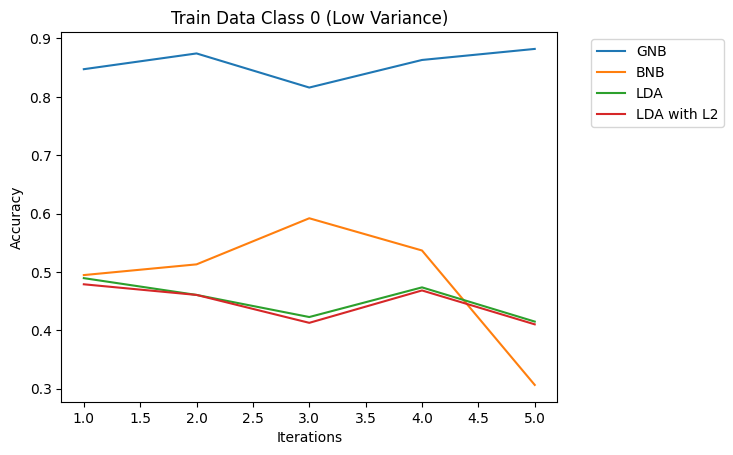

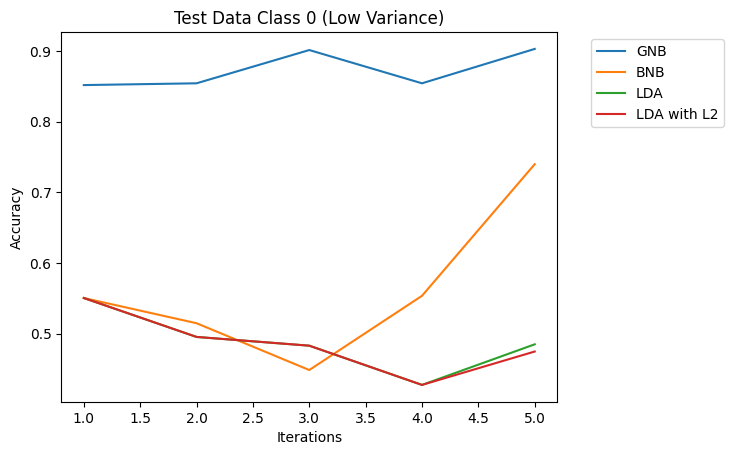

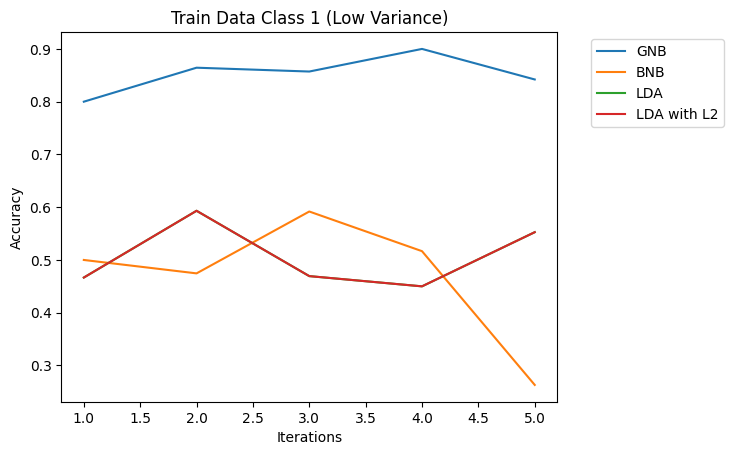

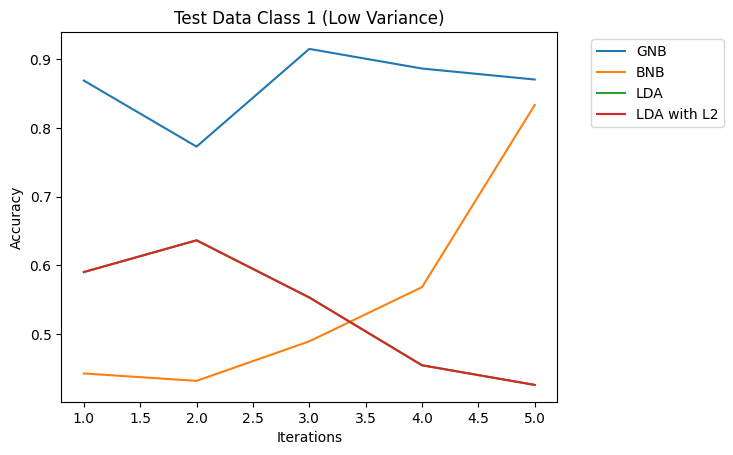

In [389]:
# Train Data Class 0 (Low Variance)
plt.plot(np.arange(1,6), gnb[:5,0])
plt.plot(np.arange(1,6), bnb[:5,0])
plt.plot(np.arange(1,6), lda[:5,0])
plt.plot(np.arange(1,6), lda_l2[:5,0])
plt.legend(["GNB", "BNB", "LDA", "LDA with L2"], bbox_to_anchor=(1.35,1))
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Train Data Class 0 (Low Variance)")
plt.show()

# Test Data Class 0 (Low Variance)
plt.plot(np.arange(1,6), gnb[:5,1])
plt.plot(np.arange(1,6), bnb[:5,1])
plt.plot(np.arange(1,6), lda[:5,1])
plt.plot(np.arange(1,6), lda_l2[:5,1])
plt.legend(["GNB", "BNB", "LDA", "LDA with L2"], bbox_to_anchor=(1.35,1))
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Test Data Class 0 (Low Variance)")
plt.show()

# Train Data Class 1 (Low Variance)
plt.plot(np.arange(1,6), gnb[:5,2])
plt.plot(np.arange(1,6), bnb[:5,2])
plt.plot(np.arange(1,6), lda[:5,2])
plt.plot(np.arange(1,6), lda_l2[:5,2])
plt.legend(["GNB", "BNB", "LDA", "LDA with L2"], bbox_to_anchor=(1.35,1))
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Train Data Class 1 (Low Variance)")
plt.show()

# Test Data Class 1 (Low Variance)
plt.plot(np.arange(1,6), gnb[:5,3])
plt.plot(np.arange(1,6), bnb[:5,3])
plt.plot(np.arange(1,6), lda[:5,3])
plt.plot(np.arange(1,6), lda_l2[:5,3])
plt.legend(["GNB", "BNB", "LDA", "LDA with L2"], bbox_to_anchor=(1.35,1))
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Test Data Class 1 (Low Variance)")
plt.show()

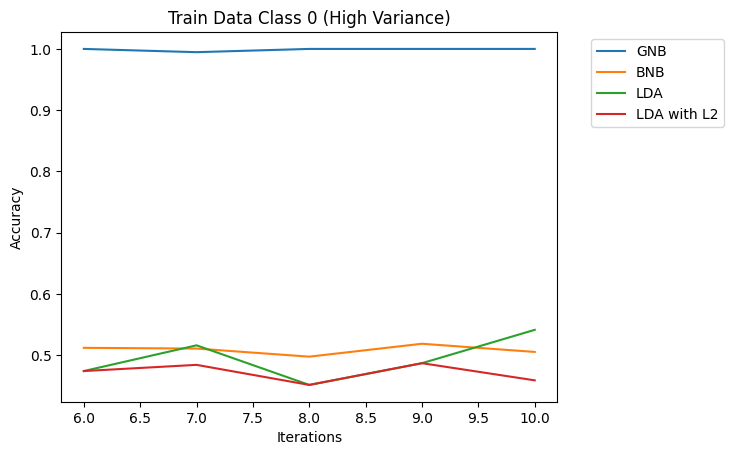

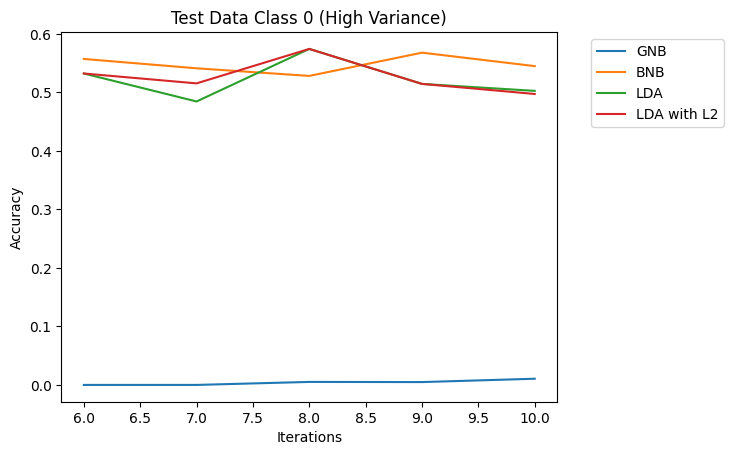

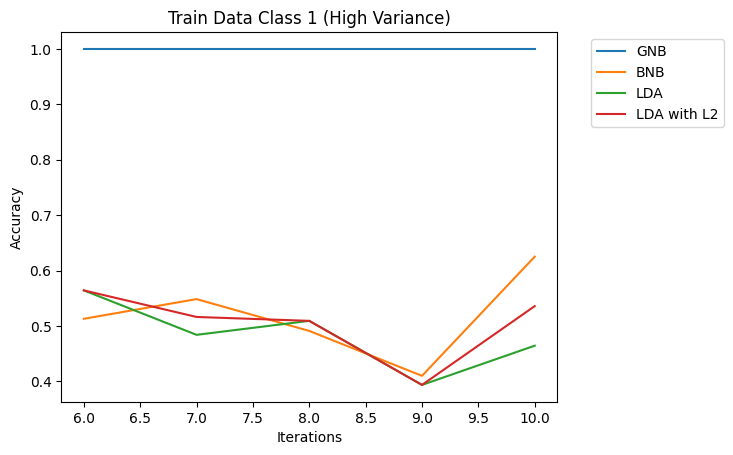

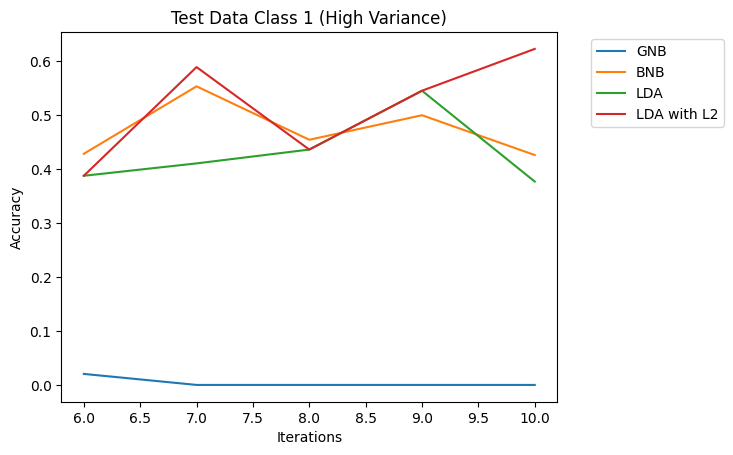

In [390]:
# Train Data Class 0 (High Variance)
plt.plot(np.arange(6,11), gnb[5:,0])
plt.plot(np.arange(6,11), bnb[5:,0])
plt.plot(np.arange(6,11), lda[5:,0])
plt.plot(np.arange(6,11), lda_l2[5:,0])
plt.legend(["GNB", "BNB", "LDA", "LDA with L2"], bbox_to_anchor=(1.35,1))
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Train Data Class 0 (High Variance)")
plt.show()

# Test Data Class 0 (High Variance)
plt.plot(np.arange(6,11), gnb[5:,1])
plt.plot(np.arange(6,11), bnb[5:,1])
plt.plot(np.arange(6,11), lda[5:,1])
plt.plot(np.arange(6,11), lda_l2[5:,1])
plt.legend(["GNB", "BNB", "LDA", "LDA with L2"], bbox_to_anchor=(1.35,1))
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Test Data Class 0 (High Variance)")
plt.show()

# Train Data Class 1 (High Variance)
plt.plot(np.arange(6,11), gnb[5:,2])
plt.plot(np.arange(6,11), bnb[5:,2])
plt.plot(np.arange(6,11), lda[5:,2])
plt.plot(np.arange(6,11), lda_l2[5:,2])
plt.legend(["GNB", "BNB", "LDA", "LDA with L2"], bbox_to_anchor=(1.35,1))
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Train Data Class 1 (High Variance)")
plt.show()

# Test Data Class 1 (High Variance)
plt.plot(np.arange(6,11), gnb[5:,3])
plt.plot(np.arange(6,11), bnb[5:,3])
plt.plot(np.arange(6,11), lda[5:,3])
plt.plot(np.arange(6,11), lda_l2[5:,3])
plt.legend(["GNB", "BNB", "LDA", "LDA with L2"], bbox_to_anchor=(1.35,1))
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Test Data Class 1 (High Variance)")
plt.show()

#### Clearly GNB performs well in low variance noise, also in high variance noise variance in acc. of other classifers show significant variance